# Data Science 1 | Final Project

### By: David Lopez

#### Word Count:

## Introduction

## Problem Statement and Background

Test sidjfisdjfoisjdfisdfonisdifoindf 
sndfjosndfonso

In [245]:
# Data Management/Investigation
import pandas as pd
from pandas.api.types import CategoricalDtype # Ordering categories
import numpy as np
import missingno as miss

# Plotting libraries
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns



# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.linear_model import LinearRegression as LM
from sklearn.ensemble import BaggingRegressor as Bag
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DTree
from sklearn.tree import DecisionTreeRegressor as DT_reg
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn import tree # For plotting the decision tree rules

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

# For model interpretation
from sklearn.inspection import (
    permutation_importance,
    partial_dependence, 
    PartialDependenceDisplay, 
    plot_partial_dependence
)

# Misc
import warnings
warnings.filterwarnings("ignore")

In [244]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

import shapefile as shp


In [235]:
GasData = pd.read_csv('/Users/davidlopez/Desktop/PPOL564/Project/GasData.csv')

ProductionData = pd.read_csv('/Users/davidlopez/Desktop/PPOL564/Project/ProductionData.csv')


In [236]:
for col in ['Treatment', 'Diet']:
    GasData[col] = GasData[col].astype('category')
    



In [237]:
GasData['Received_Seaweed'] = GasData["Treatment"].replace('High Dose ',1)
GasData['Received_Seaweed'] = GasData["Received_Seaweed"].replace('Low Dose ',1)
GasData['Received_Seaweed'] = GasData["Received_Seaweed"].replace('Control ',0)



GasData['ln_CH4_Production'] = np.log(GasData['CH4_Production'])




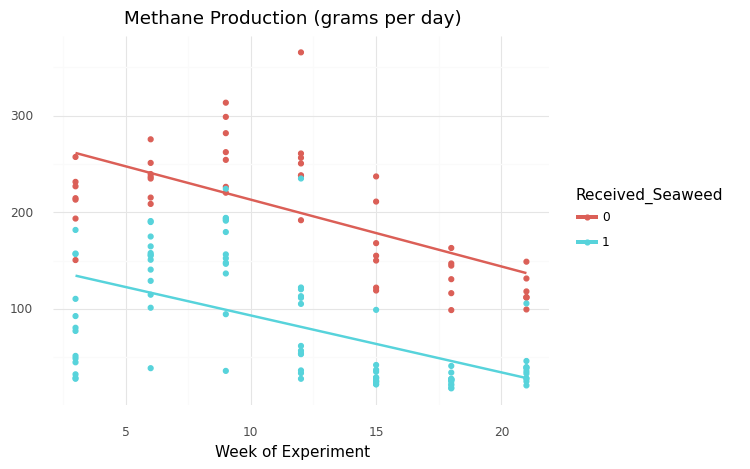

<ggplot: (304949532)>

In [238]:
(ggplot(aes(x = 'Experimental_Week', y = 'CH4_Production', color = 'Received_Seaweed'), GasData) 
 + geom_point()
 + geom_smooth(method = 'lm', se = False)
 + theme_minimal()
 + ggtitle('Methane Production (grams per day)')
 + ylab('')
 + xlab('Week of Experiment'))

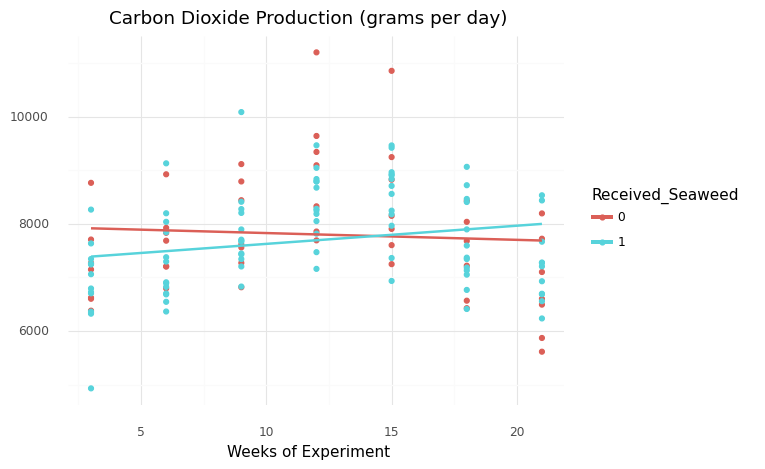

<ggplot: (304997620)>

In [232]:
(ggplot(aes(x = 'Experimental_Week', y = 'CO2_Production', color = 'Received_Seaweed'), GasData) 
 + geom_point()
 + geom_smooth(method = 'lm', se = False)
 + ggtitle('Carbon Dioxide Production (grams per day)')
 + ylab('')
 + xlab('Weeks of Experiment')
 + theme_minimal())

In [100]:
GasDataEnd = GasData[GasData['Experimental_Week']==21]

In [305]:
Treatment = GasDataEnd['Received_Seaweed'].tolist()
Log_Methane_Production = GasDataEnd['ln_CH4_Production'].tolist()
  
# adding the constant term
Treatment = sm.add_constant(Treatment)
  
# performing the regression
# and fitting the model
result = sm.OLS(Log_Methane_Production, Treatment).fit()
  
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     50.08
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           2.62e-06
Time:                        22:28:20   Log-Likelihood:                -5.3485
No. Observations:                  18   AIC:                             14.70
Df Residuals:                      16   BIC:                             16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7722      0.131     36.550      0.0

In [131]:
GasData['Diet'] = ProductionData['Diet']
GasData['Dry_Matter_Intake'] = ProductionData['Dry_Matter_Intake']
GasData['Initial_Body_Weight'] = ProductionData['Initial_Body_Weight']
GasData['Final_Body_Weight'] = ProductionData['Final_Body_Weight']
GasData['Total_Gain'] = ProductionData['Total_Gain']
GasData['Average_Daily_Gain'] = ProductionData['Average_Daily_Gain']
GasData['Feed_Conversion_Efficiency'] = ProductionData['Feed_Conversion_Efficiency']
GasData['Cost_per_Gain'] = ProductionData['Cost_per_Gain']

TreatmentData = GasData


,Treatment,Diet,Animal_ID,Experimental_Week,CO2_Production,CO2_Yield,CH4_Production,CH4_Yield,H2_Production,H2_Yield,Received_Seaweed,ln_CH4_Production,Dry_Matter_Intake,Initial_Body_Weight,Final_Body_Weight,Total_Gain,Average_Daily_Gain,Feed_Conversion_Efficiency,Cost_per_Gain
0,Control,High Forage,28,3,6620.50,613.41,150.50,13.94,0.50,0.05,0,5.013963,11.14,387.37,482.62,95.25,1.51,0.14,2.06
1,Control,High Forage,29,3,6379.00,577.92,214.50,19.43,1.10,0.10,0,5.368310,10.37,334.75,445.43,110.68,1.76,0.17,1.65
2,Control,High Forage,32,3,7707.00,756.24,231.40,22.71,1.80,0.18,0,5.444148,9.37,330.21,440.89,110.68,1.76,0.19,1.49
3,Control,High Forage,39,3,6601.00,670.02,213.00,21.62,0.88,0.09,0,5.361292,10.24,362.87,459.94,97.07,1.54,0.15,1.86
4,Control,High Forage,40,3,7268.60,708.39,226.80,22.10,1.11,0.11,0,5.424069,10.51,391.00,478.99,88.00,1.40,0.13,2.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Low Dose,NaN,31,21,7205.85,687.25,38.49,3.67,5.81,0.55,1,3.650398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,Low Dose,NaN,34,21,7270.58,667.74,35.46,3.26,5.48,0.50,1,3.568405,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,Low Dose,NaN,41,21,6233.87,626.91,46.12,4.64,3.42,0.34,1,3.831247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,Low Dose,NaN,43,21,8436.74,741.71,39.59,3.48,6.74,0.59,1,3.678577,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
ControlData = TreatmentData[TreatmentData['Received_Seaweed']==0]

ControlData = ControlData.dropna()


,Treatment,Diet,Animal_ID,Experimental_Week,CO2_Production,CO2_Yield,CH4_Production,CH4_Yield,H2_Production,H2_Yield,Received_Seaweed,ln_CH4_Production,Dry_Matter_Intake,Initial_Body_Weight,Final_Body_Weight,Total_Gain,Average_Daily_Gain,Feed_Conversion_Efficiency,Cost_per_Gain
0,Control,High Forage,28,3,6620.50,613.41,150.50,13.94,0.50,0.05,0,5.013963,11.14,387.37,482.62,95.25,1.51,0.14,2.06
1,Control,High Forage,29,3,6379.00,577.92,214.50,19.43,1.10,0.10,0,5.368310,10.37,334.75,445.43,110.68,1.76,0.17,1.65
2,Control,High Forage,32,3,7707.00,756.24,231.40,22.71,1.80,0.18,0,5.444148,9.37,330.21,440.89,110.68,1.76,0.19,1.49
3,Control,High Forage,39,3,6601.00,670.02,213.00,21.62,0.88,0.09,0,5.361292,10.24,362.87,459.94,97.07,1.54,0.15,1.86
4,Control,High Forage,40,3,7268.60,708.39,226.80,22.10,1.11,0.11,0,5.424069,10.51,391.00,478.99,88.00,1.40,0.13,2.10
5,Control,High Forage,48,3,8765.43,843.12,257.14,24.73,2.17,0.21,0,5.549621,10.27,331.12,425.47,94.35,1.50,0.15,1.92
6,Control,High Forage,50,3,7147.00,661.31,193.43,17.90,0.95,0.09,0,5.264916,8.97,355.62,450.87,95.25,1.51,0.17,1.66
7,Control,High Forage,28,6,7924.50,700.55,236.75,20.93,1.38,0.12,0,5.467005,7.82,378.30,460.85,82.55,1.31,0.17,1.67
8,Control,High Forage,29,6,7833.00,717.37,275.40,25.22,1.71,0.16,0,5.618225,8.53,351.99,440.89,88.90,1.41,0.17,1.69
9,Control,High Forage,32,6,7203.83,656.79,239.50,21.84,0.42,0.04,0,5.478553,8.43,360.15,465.39,105.23,1.67,0.20,1.41


In [133]:
treat_dummies = pd.get_dummies(ControlData.Treatment)

treat_dummies.columns = [c.lower().replace(" ","_") for c in treat_dummies.columns]

treat_dummies = treat_dummies.drop(['control_'],axis=1) # Baseline

ControlData = pd.concat([ControlData.drop(['Treatment'],axis=1),treat_dummies],axis=1)

In [134]:
ControlData['high_dose'] = ControlData['high_dose_']
ControlData['low_dose'] = ControlData['low_dose_']

ControlData = ControlData.drop(columns = ['high_dose_', 'low_dose_'])

In [136]:
diet_dummies = pd.get_dummies(ControlData.Diet)



diet_dummies.columns = [c.lower().replace(" ","_") for c in diet_dummies.columns]

diet_dummies = diet_dummies.drop(['medium_forage'],axis=1) # Baseline



ControlData = pd.concat([ControlData.drop(['Diet'],axis=1),diet_dummies],axis=1)

In [174]:
MLData = ControlData[['CH4_Production', 'Dry_Matter_Intake', 'Initial_Body_Weight','Final_Body_Weight', 'Total_Gain', 'Average_Daily_Gain','Feed_Conversion_Efficiency', 'high_forage']]


,CH4_Production,Dry_Matter_Intake,Initial_Body_Weight,Final_Body_Weight,Total_Gain,Average_Daily_Gain,Feed_Conversion_Efficiency,high_forage
0,150.50,11.14,387.37,482.62,95.25,1.51,0.14,1
1,214.50,10.37,334.75,445.43,110.68,1.76,0.17,1
2,231.40,9.37,330.21,440.89,110.68,1.76,0.19,1
3,213.00,10.24,362.87,459.94,97.07,1.54,0.15,1
4,226.80,10.51,391.00,478.99,88.00,1.40,0.13,1
5,257.14,10.27,331.12,425.47,94.35,1.50,0.15,1
6,193.43,8.97,355.62,450.87,95.25,1.51,0.17,1
7,236.75,7.82,378.30,460.85,82.55,1.31,0.17,1
8,275.40,8.53,351.99,440.89,88.90,1.41,0.17,1
9,239.50,8.43,360.15,465.39,105.23,1.67,0.20,1


In [175]:
y = MLData['CH4_Production']

X = MLData[['Dry_Matter_Intake', 'Initial_Body_Weight', 'Final_Body_Weight', 'Total_Gain', 'Average_Daily_Gain','Feed_Conversion_Efficiency','high_forage']]


In [176]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=2000)

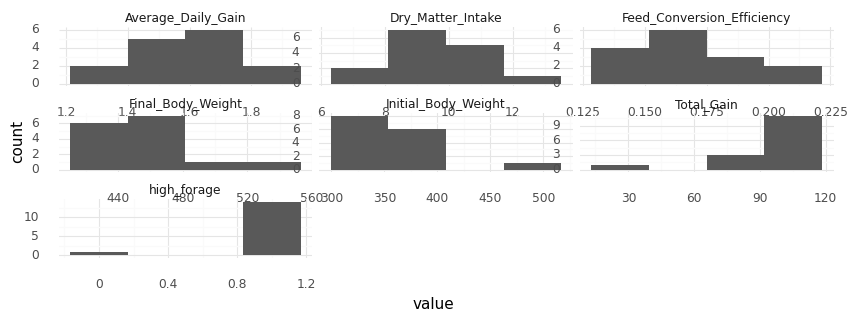

<ggplot: (304582184)>

In [178]:
#(
#    ggplot(train_X.melt(),aes(x="value")) +
#    geom_histogram() +
#    facet_wrap("variable",scales="free") +
#    theme_minimal() +
#    theme(figure_size = (10,3)) 
#) 

In [213]:

train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=1239)

fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)

pipe = Pipeline(steps=[('pre_process', pp.MinMaxScaler()),
                       ('model',None)])


my_models = [
    
    # Linear Model
    {'model' : [LM()]},
    
    # KNN with tuning parameters
    {'model' : [KNN()],
    'model__n_neighbors':[10,15,20,25,30]},
    
    # Decision Tree Classifier
    {'model' : [DTree()],
    'model__max_depth':[1,2,3,5]},
    
    {'model' : [Bag()]},
    
    # Random Forrest Classifier
    {'model' : [RF()],
    'model__max_depth':[1,2,3],
    'model__n_estimators':[500,1000,1250]}
     
     ]

In [214]:
search = GridSearchCV(pipe, my_models,
                     cv = fold_generator,
                     scoring = 'neg_mean_squared_error',
                     n_jobs = 4)

search.fit(train_X, train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=Pipeline(steps=[('pre_process', MinMaxScaler()),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [LinearRegression()]},
                         {'model': [KNeighborsClassifier()],
                          'model__n_neighbors': [10, 15, 20, 25, 30]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [1, 2, 3, 5]},
                         {'model': [BaggingRegressor()]},
                         {'model': [RandomForestClassifier()],
                          'model__max_depth': [1, 2, 3],
                          'model__n_estimators': [500, 1000, 1250]}],
             scoring='neg_mean_squared_error')

In [215]:
#search.best_score_


-2035.1131266000004

In [216]:
#search.best_params_

{'model': BaggingRegressor()}

In [217]:
pred_y = search.predict(test_X)

#m.mean_squared_error(test_y,pred_y)

2278.114708500001

In [218]:
#m.r2_score(test_y,pred_y)

-0.272416697440633

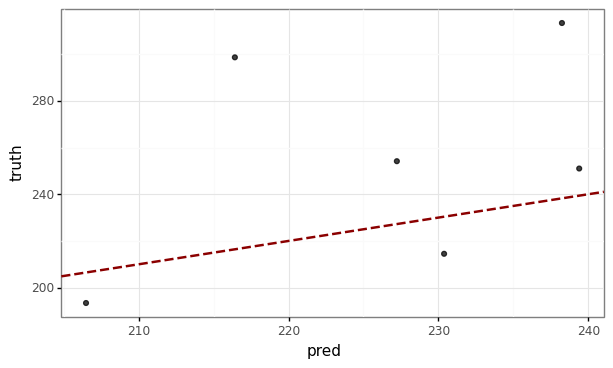

<ggplot: (330412026)>

In [303]:
(ggplot(pd.DataFrame(dict(pred=pred_y,truth=test_y)),
          aes(x='pred',y="truth")) +
    geom_point(alpha=.75) +
    geom_abline(linetype="dashed",color="darkred",size=1) +
    theme_bw() +
    theme(figure_size=(7,4)))

In [220]:
bag_mod = search.best_estimator_


In [221]:
vi = permutation_importance(bag_mod,train_X,train_y,n_repeats=5)


# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                           vi = vi['importances_mean'],
                           std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# Put in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)

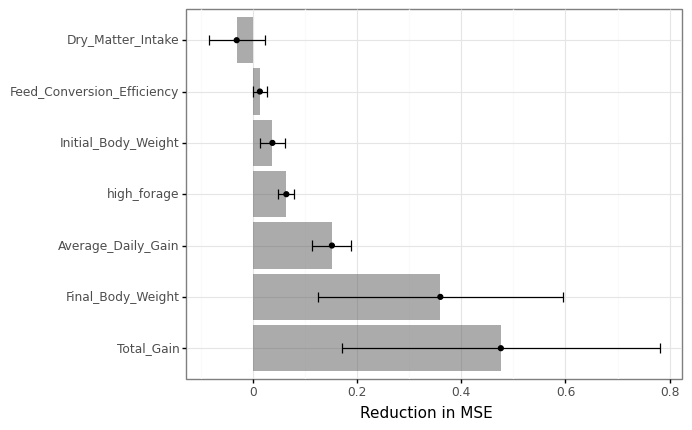

<ggplot: (304773232)>

In [223]:
(
    ggplot(vi_dat,
          aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in MSE",x="")
)

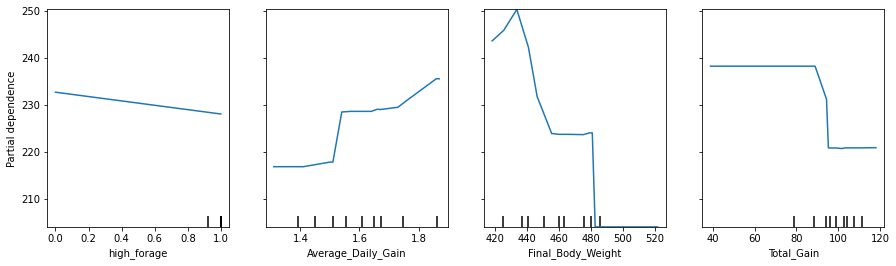

In [225]:
features = ['high_forage','Average_Daily_Gain','Final_Body_Weight', 'Total_Gain']

# Plot Partial dependency plots for top variables
fig, ax = plt.subplots(figsize=(15, 4))
display = plot_partial_dependence(
    bag_mod, train_X, features,n_cols=5,
    n_jobs=4, grid_resolution=30,ax=ax
)

In [247]:
shp_path = '/Users/davidlopez/Desktop/PPOL564/Project/cb_2018_us_county_500k/cb_2018_us_county_500k.shp'

sf = shp.Reader(shp_path)

len(sf.shapes())

3233

In [256]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [257]:
df = read_shapefile(sf)


df.shape

(3233, 10)

In [301]:
df.drop(df[df['STATEFP'] == 2].index, inplace=True)

df


,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,coords
0,21,007,00516850,0500000US21007,21007,Ballard,06,639387454,69473325,"[(-89.18136899999999, 37.046305), (-89.179384,..."
1,21,017,00516855,0500000US21017,21017,Bourbon,06,750439351,4829777,"[(-84.442661, 38.283235999999995), (-84.441137..."
2,21,031,00516862,0500000US21031,21031,Butler,06,1103571974,13943044,"[(-86.944858, 37.073406999999996), (-86.943458..."
3,21,065,00516879,0500000US21065,21065,Estill,06,655509930,6516335,"[(-84.126618, 37.645404), (-84.12483399999999,..."
4,21,069,00516881,0500000US21069,21069,Fleming,06,902727151,7182793,"[(-83.984282, 38.445493), (-83.98246, 38.45002..."
...,...,...,...,...,...,...,...,...,...,...
3228,31,073,00835858,0500000US31073,31073,Gosper,06,1186616237,11831826,"[(-100.095095, 40.438656), (-100.089374, 40.43..."
3229,39,075,01074050,0500000US39075,39075,Holmes,06,1094405866,3695230,"[(-82.220665, 40.66758), (-82.193271, 40.66750..."
3230,48,171,01383871,0500000US48171,48171,Gillespie,06,2740719114,9012764,"[(-99.303996, 30.499831999999998), (-99.282344..."
3231,55,079,01581100,0500000US55079,55079,Milwaukee,06,625440563,2455383635,"[(-88.069586, 42.867263), (-88.069586, 42.8728..."


In [287]:
def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

48    254
13    159
51    133
21    120
29    115
20    105
17    102
37    100
19     99
47     95
31     93
18     92
39     88
27     87
26     83
28     82
72     78
40     77
05     75
55     72
01     67
12     67
42     67
46     66
08     64
22     64
36     62
06     58
30     56
54     55
38     53
45     46
16     44
53     39
41     36
35     33
49     29
02     29
24     24
56     23
34     21
32     17
23     16
04     15
25     14
50     14
33     10
09      8
60      5
15      5
44      5
69      4
78      3
10      3
11      1
66      1
Name: STATEFP, dtype: int64

(-101.17793327040597, 29.56467427448857)

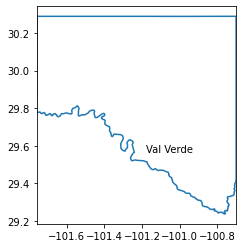

In [294]:
name = 'Val Verde'
countyFP = df[df.NAME == name].index.values[0]
plot_shape(countyFP, name)



In [278]:
sf.shape()

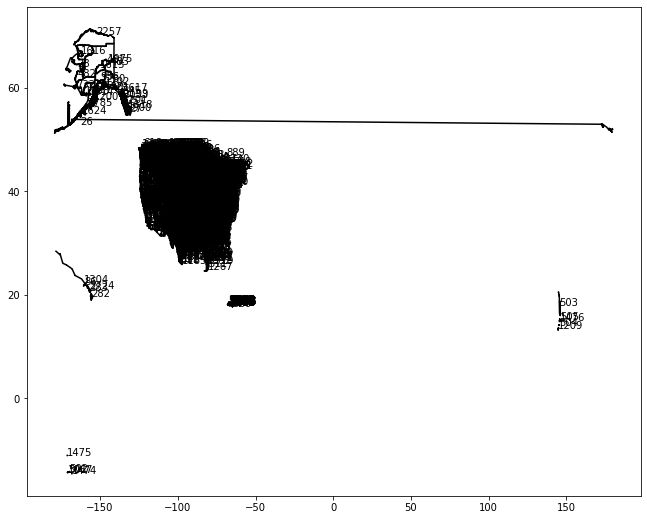

In [302]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        

plot_map(sf)

In [281]:
def plot_map2(id, sf, x_lim = None, y_lim = None, figsize=(11,9)):
    '''
    Plot map with lim coordinates
    '''
   
    plt.figure(figsize = figsize)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat, 'r', linewidth=3) 
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        

plot_map2(799, sf, x_lim, y_lim)

NameError: name 'x_lim' is not defined